## Project: Wrangling and Analyzing Data (WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Gathering</a></li>
<li><a href="#eda">Data Assessing</a></li>
<li><a href="#eda">Data Cleaning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction

The project is aimed at **Data wrangling**, documenting wrangling process in a Jupyter Notebook, and showcasing them through
analyses and visualizations using Python libraries. 
The dataset that is wrangled is the tweet archive @DogRates, also known as @WeRateDogs. ‘WeRateDogs’ is a Twitter account that rates people's dogs with a humorous comment about the dog.

In this data analysis project, I aimed at Gathering 3 datasets, Assessing the data both visually and programmatically to identify tidiness & quality issues and cleaning the dataset.

The three datasets was provided by udacity and was downloaded  manually from the link provided in the classroom. Some variable includes:
- tweet_id: the last part of the tweet URL after "status/" 
- p1: the algorithm's #1 prediction for the image in the tweet 
- p1_conf: is how confident the algorithm is in its #1 prediction 
- p1_dog: is whether or not the #1 prediction is a breed of dog
- p2: the algorithm's second most likely prediction
- p2_conf: is how confident the algorithm is in its #2 prediction 
- p2_dog: is whether or not the #2 prediction is a breed of dog 


In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO



## Data Gathering

This is the first process in Data Wrangling.I downloaded three different datasets in different file format(.csv,.tsv,json) which were obtained from the link in Udacity classroom

In [2]:
archive=pd.read_csv(r'C:\Users\user\Downloads\twitter-archive-enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Downloaded the tweet image prediction file programmatically by using the Requests library

In [3]:
# Using Requests library to download the image file then store it in a tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
#Read the image into a dataframe called prediction
prediction= pd.read_csv(r'C:\Users\user\Downloads\image-predictions.tsv', sep='\t')
prediction.head()


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Reading of the "tweet-json.txt" file into the dataframe

In [4]:
#Reading the Json.txt file into Pandas DataFrame called "tweets_json"
file=[]

with open(r'C:\Users\user\Downloads\tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data=json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        file.append({'tweet_id':tweet_id,
                     'retweet_count':int(retweet_count),
                     'favorite_count':int(favorite_count)})


tweets_json=pd.DataFrame(file, columns=['tweet_id','retweet_count','favorite_count'])
tweets_json.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

## Assessing Data

In this section,I assessed the data visually and programmatically to detect quality and tidiness issues.

### Visual Assessment

In [5]:
#Visual assessment of 'archive' dataframe
archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [6]:
#Visual assessment of 'prediction' dataframe
prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [7]:
#Visual assessment of 'tweet_json' dataframe
tweets_json

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

### Programmatic Assessment

In [8]:
#checking the first few rows of the 1st dataframe
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [9]:
#Returns the number of rows and columns in the archive dataframe
archive.shape
print("There are {} records in archive dataframe".format(archive.shape[0]))
print("There are {} fields in archive dataframe".format(archive.shape[1]))

There are 2356 records in archive dataframe
There are 17 fields in archive dataframe


In [10]:
#Programmatic assessment of 'archive' table
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#Returns the total sum of null values in each columns of the archive dataframe
archive.isna().sum()*100/len(archive)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [12]:
#Returns the duplicates columns containing null values
archive.duplicated().sum()

0

In [13]:
#frequency of the values in 'doggo' column
archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
#frequency of the values in the 'floofer' column
archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
#frequency of the values in the 'pupper' column
archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
#frequency of the values in 'puppo' column
archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
#returns the unique values 
archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [18]:
#returns the unique values
archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [19]:
#locating name with lowercase 
archive[archive.name.str.match('[a-z].*')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    NaN                  NaN   
56    881536004380872706                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
193   855459453768019968                    NaN                  NaN   
...                  ...                    ...                  ...   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   

                      timestamp  \
22    2017-07-19 03:39:09 +0000   
56    2017-07-02 15:32:16 +0000   
118   2017-05-31 18:47:24 +0000   
169   2017-05-02 00:04:57 +0000   
193   2017-04-21 16:33:22 +0000   
...                         ...   
2349  2015-11-16 00:35:11 +0000   
2350  2015-11-16 00:30:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   

                                                 source  \
22    <a href="http://twitter.com/download/iphone" r...   
56    <a href="http://twitter.com/download/iphone" r...   
118   <a href="http://twitter.com/download/iphone" r...   
169   <a href="http://twitter.com/download/iphone" r...   
193   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
22    I've yet to rate a Venezuelan Hover Wiener. Th...                  NaN   
56    Here is a pupper approaching maximum borkdrive...                  NaN   
118   RT @dog_rates: We only rate dogs. This is quit...         8.591970e+17   
169   We only rate dogs. This is quite clearly a smo...                  NaN   
193   Guys, we only rate dogs. This is quite clearly...                  NaN   
...                                                 ...                  ...   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   
2350  This is a truly beautiful English Wilson Staff...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
22                         NaN                        NaN   
56                         NaN                        NaN   
118               4.196984e+09  2017-05-02 00:04:57 +0000   
169                        NaN                        NaN   
193                        NaN                        NaN   
...                        ...                        ...   
2349                       NaN                        NaN   
2350                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
22    https://twitter.com/dog_rates/status/887517139...                14   
56    https://twitter.com/dog_rates/status/881536004...                14   
118   https://twitter.com/dog_rates/status/859196978...                12   
169   https://twitt

In [20]:
#Returns the unique names with lowercase letter
invalidname=list(filter(lambda x: x.islower(), archive.name))
pd.unique(invalidname)

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [21]:
#locating names starting with uppercase letter
names=list(filter(lambda x: x.isupper(), archive.name))
pd.unique(names)

array(['O', 'JD'], dtype=object)

In [22]:
#locate the name "O" in t he archive dataframe
archive.loc[archive['name']=='O']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775  776201521193218049                    NaN                  NaN   

                     timestamp  \
775  2016-09-14 23:30:38 +0000   

                                                source  \
775  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
775  This is O'Malley. That is how he sleeps. Doesn...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
775                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
775  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator name doggo floofer pupper puppo  
775                  10    O  None    None   None  None

In [23]:
#locate the name "JD" in the archive dataframe
archive.loc[archive['name']=='JD']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2041  671542985629241344                    NaN                  NaN   

                      timestamp  \
2041  2015-12-01 04:14:59 +0000   

                                                 source  \
2041  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2041  This is JD (stands for "just dog"). He's like ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2041                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2041  https://twitter.com/dog_rates/status/671542985...                10   

      rating_denominator name doggo floofer pupper puppo  
2041                  10   JD  None    None   None  None

In [24]:
#Checking to know if there are records with None values in the name column
archive.loc[archive['name']== 'None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2342  2015-11-16 02:38:37 +0000   
2343  2015-11-16 01:59:36 +0000   
2344  2015-11-16 01:52:02 +0000   
2351  2015-11-16 00:24:50 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
5     Here we have a majestic great white breaching ...                  NaN   
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2342  Here we have a well-established sunblockerspan...                  NaN   
2343  Let's hope this flight isn't Malaysian (lol). ...                  NaN   
2344  Here we have a northern speckled Rhododendron....                  NaN   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
5                          NaN                        NaN   
7                          NaN                        NaN   
12                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2342                       NaN                        NaN   
2343                       NaN                        NaN   
2344                       NaN                        NaN   
2351                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
5     https://twitter.com/dog_rates/status/891087950...                13   
7     https://twitter.com/dog_rates/status/890729181...                13   
12    https://twitter.com/dog_rates/status/889665388...                13   
24    https://twitt

In [25]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [26]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [27]:
archive[archive['rating_denominator']==10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [28]:
#Returns the total number of duplicate values in the archive dataframe
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [29]:
#Summary statistics of the archive dataframe
archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [30]:
prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [31]:
#Returns the number of rows and columns in the prediction dataframe
prediction.shape

(2075, 12)

In [32]:
#Programmatic assessment of 'prediction' table
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
#returns the total sum of null values found in the prediction dataframe
prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [34]:
#Returns the total number of duplicate values in the prediction dataframe
prediction.duplicated().sum()

0

In [35]:
prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
prediction[['p1_dog','p2_dog','p3_dog']].sample(5)

p1_dog  p2_dog  p3_dog
1681    True    True    True
1038   False   False   False
0       True    True    True
2030    True    True   False
84      True    True    True

In [37]:
#Summary statistics of the prediction dataframe
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [38]:
tweets_json.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [39]:
#Returns the number of rows and columns in the tweets_json dataframe
tweets_json.shape

(2354, 3)

In [40]:
#Programmatic assessment of 'json_tweets' table
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [41]:
#Returns the total number of duplicate values in the tweet_json dataframe
tweets_json.duplicated().sum()

0

In [42]:
#Returns the total sum of null values in each columns of the tweets_json dataframe
tweets_json.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [43]:
#Summary statistics of the tweets_json dataframe
tweets_json.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

## Quality Issues

Archive Table 
<ul>
<li>Drop in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,expanded_urls,retweeted_status_timestamp columns</li>
<li>Drop name starting with lowercase because it's invalid names</li>
<li>Replace name with O to O'Malley values because it was an error</li>
<li>Changing tweet_id datatype to object</li>
<li>Changing timestamp and retweeted timestamp datatype to datetime</li>
<li>Rename the name column to "Dog Name"</li>
<li>Replace the None values in name,doggo,floofer,poppo,pupper to np.nan</li> 



Prediction Table
<ul>
<li>Capitalize each first letter of p1, p2,p3 columns</li>
<li> Merge the p1,p2,p3 into a single column </li>
<li>Convert tweet_id data types to object</li>
</ul>

Tweets_Json Table
<ul>
<li>Changing tweet_id datatype to object</li>
</ul>

## Tidiness Issues

<ul>
<li>Merge the p1,p2,p3 columns into a single columns named "dog_predictions"</li>
<li>Merge doggo, floofer, pupper and puppo columns in a single column nmaed "dog_stages"</li> 
<li>Merge the 3 tables together based on 'tweet_id'</li>
</ul>

## Data Cleaning

In [44]:
#Copying each piece of the data
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweets_json_clean = tweets_json.copy()

### Resolving Quality Issues

### Issue 1

There are columns with more than 50% missing values in the archive table and they include  in_reply_to_status_id,
in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,expanded_urls and retweeted_status_timestamp columns

#### Define: Dropping of columns with more than 50% of the records contains missing values

#### Code

In [45]:
#created a list of the columns to drop
to_drop=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','expanded_urls',
         'retweeted_status_timestamp']

#dropping of the columns created in the list
archive_clean.drop(to_drop,axis=1, inplace=True)

#### Test

In [46]:
#details of the archive dataframe
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue 2

There are cases of invalid names found in the name columns.Names starting with lowercase letter has invalid names such as 'a','quite','such' e.t.c. In this cases, we are only interested in names that doesn't start with lowercase letter

#### Define: Selecting of valid name starting with uppercase letter

#### Code

In [47]:
#selecting values whose first letter start with a capital letter
archive_clean=archive_clean[archive_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [48]:
#checking to if there are no names starting with lowercase letter
names=list(filter(lambda x: x.islower(), archive_clean.name))
pd.unique(names)

array([], dtype=float64)

### Issue 3

There was error in the recording of names like 'O' and 'JD'.In the dataframe, it was recorded by the initials of the word,
I will be replacing with the real word (i.e O'Marley and 'just dog').

#### Define:Replacing the names in the uppercase letters with np.nan and dropping them

#### Code

In [49]:
#Replace the name O to O`Malley
archive_clean['name'].replace('O','O`Malley',inplace=True)
archive_clean['name'].replace('JD','just dog', inplace=True)
archive_clean['name'].replace('Bo', np.nan, inplace=True)
archive_clean['name'].replace('None', np.nan, inplace=True)
#archive_clean['name'].replace('a', np.nan, inplace=True)

In [50]:
#dropping of the null values found in the name columns of the archive dataframe
archive_clean=archive_clean.dropna(subset=['name'])

#### Test

In [51]:
#checking if the null values in the name column has been dropped
archive['name'].isnull().sum()

0

In [52]:
#Test if changes has been made
archive_clean.loc[archive_clean['name']=='O`Malley']
archive_clean.loc[archive_clean['name']=='just dog']

tweet_id                  timestamp  \
2041  671542985629241344  2015-12-01 04:14:59 +0000   

                                                 source  \
2041  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
2041  This is JD (stands for "just dog"). He's like ...                10   

      rating_denominator      name doggo floofer pupper puppo  
2041                  10  just dog  None    None   None  None

### Issue 4

Tweet_id columns in the three datasets have an erroneous datatype

#### Define: Convert the tweet_id datatype from int64 to datetype

####  Code

In [53]:
#changing the datatype of the 'tweet_id' in the 3 dataframe to object
archive_clean['tweet_id']=archive_clean['tweet_id'].astype(str)
prediction_clean['tweet_id']=prediction_clean['tweet_id'].astype(str)
tweets_json_clean['tweet_id']=tweets_json_clean['tweet_id'].astype(str)

#### Test

In [54]:
#checking if changes has been made
print(archive_clean['tweet_id'].dtypes)
print(prediction_clean['tweet_id'].dtypes)
print(tweets_json_clean['tweet_id'].dtypes)

object
object
object


### Issue 5

Incorrect data type in the timestamp column

#### Define: Convert timestamp column from object to datetime

#### Code

In [55]:
#changing the dtypes to datetime
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])


#### Test

In [56]:
#checking if changes has been made
archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue 6

Columns such as name,doggo,floofer,pupper,puppo has in the archive table has none values which should be replace as np.nan

#### Define: Replace the none values to np.nan

#### Code

In [57]:
#replacing of the None values to np.nan
archive_clean['doggo'].replace('None', np.NAN, inplace =True)
archive_clean['floofer'].replace('None', np.NAN, inplace =True)
archive_clean['pupper'].replace('None', np.NAN, inplace =True)
archive_clean['puppo'].replace('None', np.NAN, inplace =True)

#### Test

In [58]:
#checking if changes has been made
archive_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
doggo                 1446
floofer               1488
pupper                1361
puppo                 1473
dtype: int64

### Issue 7

Rating_numerator and denonimator columns contains some invalid number .During ratings of dogs carried out by @weratedogs, the denominators of the ratings is always 10 and the rating numerator doesn't execeed 15

#### Define:Drop the values that exceed 10 for the numerator and >15 for the denominator  in the archive dataframe

#### Code

In [59]:
numerator=archive_clean[archive_clean['rating_numerator']>=16]
archive_clean=archive_clean.drop(numerator.index, axis=0)

In [60]:
denominator=archive_clean[archive_clean['rating_denominator']!=10]
archive_clean=archive_clean.drop(denominator.index, axis=0)

#### Test

In [61]:
assert [archive_clean['rating_numerator'].index==10]

In [62]:
print(archive_clean['rating_numerator'].value_counts())
print(archive_clean['rating_denominator'].value_counts())

12    380
11    340
10    286
13    203
9     102
8      74
7      33
14     19
6      17
5      14
3      10
4       5
2       3
Name: rating_numerator, dtype: int64
10    1486
Name: rating_denominator, dtype: int64


### Issue 8

Non uniform observations in columns p1,p2,p3 in the prediction dataframe

#### Define: Capitalize each first letter of p1, p2,p3 columns

#### Code

In [63]:
prediction_clean['p1']=prediction_clean['p1'].map(lambda x: x.capitalize())
prediction_clean['p2']=prediction_clean['p2'].map(lambda x: x.capitalize())
prediction_clean['p3']=prediction_clean['p3'].map(lambda x: x.capitalize())

#### Test

In [64]:
#returns random index for p1,p2,p3 in dataframe
prediction_clean[['p1','p2','p3']].sample(5)

p1                p2                p3
933        Border_collie            Collie  English_springer
1448           Mousetrap       Black_widow       Paddlewheel
1690       Border_collie          Cardigan            Collie
1550  Labrador_retriever  Golden_retriever            Kuvasz
1766      Great_pyrenees  Golden_retriever          Pekinese

### Resolving Tidiness Issues

### Issue 9

Merge doggo,pupper, floofer,poppo columns into a single column called "dog stages" since they are all stages of growth in dogs.

#### Define: Use the melt function to merge the 4 columns together and convert the datatype to category

#### Code

In [65]:
#merging of into a single column named "dog_stage"
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'source','text', 'rating_numerator',
                        'rating_denominator','name'],value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],var_name='growth_stage', value_name='dog_stage')
archive_clean.drop('growth_stage', axis=1,inplace=True)
#Filter for unique values then remove duplicate values based on 'dog_stage' values
#archive_clean = archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id')
archive_clean.drop_duplicates(inplace=True)
archive_clean.dog_stage.value_counts()


pupper     131
doggo       47
puppo       20
floofer      5
Name: dog_stage, dtype: int64

#### Test 

In [66]:
assert 'dog_stage' in archive_clean.columns

### Issue 10

Ratings for dogs is always in the format of: rating_numerator/rating_denominator. So we have to create a new column to show ratings of doing is in the right format

#### Define: Create a new column called ratings

#### Code

In [67]:
archive_clean['ratings']= archive_clean['rating_numerator'].astype(str) + '/'+ archive_clean['rating_denominator'].astype(str)
archive_clean['ratings'].unique()

array(['13/10', '12/10', '14/10', '5/10', '11/10', '6/10', '10/10',
       '7/10', '9/10', '8/10', '3/10', '4/10', '2/10'], dtype=object)

#### Test

In [68]:
assert 'ratings' in archive_clean.columns

### Issue 11

After checking of the unique values for each of the columns(p1_dog,p2_dog,p3_dog) which explains whether or not the prediction is a breed of dogs, i noticed it has true and false value.
Since the main interest is the predictions of dogs, we would only need the prediction whose values are **True**

#### Define: Merge columns

In [69]:
dog_breed=[]

def prediction(prediction_clean):
    if prediction_clean.p1_dog==True:
        dog_breed.append(prediction_clean.p1)
    elif prediction_clean.p2_dog==True:
        dog_breed.append(prediction_clean.p2)
    elif prediction_clean.p3_dog==True:
        dog_breed.append(prediction_clean.p3)
    else:
        dog_breed.append('Error')
        
prediction_clean.apply(prediction, axis=1)

prediction_clean['dog_breed']=dog_breed

#### Test

In [70]:
prediction_clean['dog_breed'].value_counts()

Error                   324
Golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Standard_schnauzer        1
Bouvier_des_flandres      1
Silky_terrier             1
Japanese_spaniel          1
Scotch_terrier            1
Name: dog_breed, Length: 114, dtype: int64

### Issue 12

We are only interested in the prediction of p1_dogs,p2_dogs,p3_dogs whose prediction is True to get the actual confidence level. So we would be creating a new columns to merge the confidence level of each predictions of dogs

#### Define: Creating a new columns to get the confidence level of all predictions 

#### Code

In [71]:
confidence_level=[]

def prediction(prediction_clean):
    if prediction_clean.p1_dog==True:
        confidence_level.append(prediction_clean.p1_conf)
    elif prediction_clean.p2_dog==True:
        confidence_level.append(prediction_clean.p2_conf)
    elif prediction_clean.p3_dog==True:
        confidence_level.append(prediction_clean.p3_conf)
    else:
        confidence_level.append('Error')
        
prediction_clean.apply(prediction, axis=1)

prediction_clean['confidence_level']=confidence_level

#### Test

In [72]:
prediction_clean['confidence_level'].value_counts()

Error        324
0.99383        2
0.556595       2
0.0464032      2
0.938048       2
            ... 
0.519047       1
0.918441       1
0.496953       1
0.442612       1
0.281463       1
Name: confidence_level, Length: 1689, dtype: int64

### Issue 13

#### Define: Drop the Error values in confidence_level and dog_breed columns

#### Code

In [73]:
prediction_clean=prediction_clean[prediction_clean['confidence_level']!='Error']
prediction_clean=prediction_clean[prediction_clean['dog_breed']!='Error']

#### Test

In [74]:
print(prediction_clean['confidence_level'].value_counts())
print(prediction_clean['dog_breed'].value_counts())

0.245773    2
0.861651    2
0.585441    2
0.735163    2
0.416769    2
           ..
0.240427    1
0.128056    1
0.431080    1
0.519047    1
0.281463    1
Name: confidence_level, Length: 1688, dtype: int64
Golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
Pug                    65
                     ... 
Japanese_spaniel        1
Irish_wolfhound         1
Standard_schnauzer      1
Entlebucher             1
Clumber                 1
Name: dog_breed, Length: 113, dtype: int64


In [75]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   object 
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_breed         1751 non-null   object 
 13  confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


### Issue 14

Some columns need to be removed because it has been merge

#### Define: Columns like p1, p1_dog,  p1_conf, p2, p2_dog, p2_conf, p3, p3_dog, p3_conf

In [76]:
prediction_clean = prediction_clean.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1)

#### Test

In [77]:
prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'confidence_level'], dtype='object')

### Issue 15

Merge of the three dataframe into a single dataframe based on the common unique id which is tweet_id

#### Define: Merging of archive_clean, prediction_clean, tweets_json_clean dataframe based on tweet_id

#### Code

In [78]:
Twitter_data = tweets_json_clean.merge(archive_clean, on='tweet_id', how='inner').merge(prediction_clean, on='tweet_id', how='inner')

In [79]:
#dropping duplicates
Twitter_data.drop_duplicates(inplace=True)

### Test

In [80]:
Twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1372 non-null   object             
 1   retweet_count       1372 non-null   int64              
 2   favorite_count      1372 non-null   int64              
 3   timestamp           1372 non-null   datetime64[ns, UTC]
 4   source              1372 non-null   object             
 5   text                1372 non-null   object             
 6   rating_numerator    1372 non-null   int64              
 7   rating_denominator  1372 non-null   int64              
 8   name                1372 non-null   object             
 9   dog_stage           154 non-null    object             
 10  ratings             1372 non-null   object             
 11  jpg_url             1372 non-null   object             
 12  img_num             1372 non-null 

### Issue 16

In [81]:
#dropping rating_numerator and rating_denominator
Twitter_data.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [82]:
Twitter_data.shape

(1372, 13)

In [83]:
Twitter_data.isna().sum()

tweet_id               0
retweet_count          0
favorite_count         0
timestamp              0
source                 0
text                   0
name                   0
dog_stage           1218
ratings                0
jpg_url                0
img_num                0
dog_breed              0
confidence_level       0
dtype: int64

In [84]:
Twitter_data.sample(10)

tweet_id  retweet_count  favorite_count  \
712   734776360183431168            608            2742   
1294  669324657376567296            223             525   
554   767122157629476866           3261           11227   
410   795400264262053889           3323           11270   
725   730427201120833536           1176            3809   
1298  669000397445533696           6965           22118   
389   799757965289017345           2506            9390   
558   766313316352462849           2166            7493   
711   734912297295085568            572            2993   
708   735256018284875776            993            3675   

                     timestamp  \
712  2016-05-23 16:01:50+00:00   
1294 2015-11-25 01:20:08+00:00   
554  2016-08-20 22:12:29+00:00   
410  2016-11-06 22:59:35+00:00   
725  2016-05-11 15:59:50+00:00   
1298 2015-11-24 03:51:38+00:00   
389  2016-11-18 23:35:32+00:00   
558  2016-08-18 16:38:26+00:00   
711  2016-05-24 01:02:00+00:00   
708  2016-05-24 23:47:49+00:00   

                                                 source  \
712   <a href="http://twitter.com/download/iphone" r...   
1294  <a href="http://twitter.com/download/iphone" r...   
554   <a href="http://twitter.com/download/iphone" r...   
410   <a href="http://twitter.com/download/iphone" r...   
725   <a href="http://twitter.com/download/iphone" r...   
1298  <a href="http://twitter.com/download/iphone" r...   
389   <a href="http://twitter.com/download/iphone" r...   
558   <a href="http://twitter.com/download/iphone" r...   
711   <a href="http://twitter.com/download/iphone" r...   
708   <a href="http://twitter.com/download/iphone" r...   

                                                   text      name dog_stage  \
712   This is Livvie. Someone should tell her it's b...    Livvie       NaN   
1294  Meet Ralf. He's a miniature Buick DiCaprio. Ca...      Ralf       NaN   
554   This is Rupert. You betrayed him with bath tim...    Rupert       NaN   
410   This is Brody. He's trying to make the same fa...     Brody       NaN   
725   This is Crystal. She's flawless. Really wants ...   Crystal       NaN   
1298  Meet Terrance. He's being yelled at because he...  Terrance       NaN   
389   This is Sobe. She's a h*ckin happy doggo. Only...      Sobe     doggo   
558   This is Oscar. He has legendary eyebrows and h...     Oscar       NaN   
711   This is Jax. He's a literal fluffball. Sneaky ...       Jax       NaN   
708   This is Kellogg. He accidentally opened the fr...   Kellogg       NaN   

     ratings                                          jpg_url  img_num  \
712    11/10  https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg        1   
1294   11/10  https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg        1   
554    13/10  https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg        2   
410    12/10  https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg        2   
725    11/10  https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg        1   
1298   11/10  https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg        1   
389    13/10  https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg        1   
558    12/10  https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg        1   
711    10/10  https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg        1   
708     8/10  https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg        1   

                      dog_breed confidence_level  
712              Siberian_husky         0.304902  
1294                   Cardigan         0.131544  
554                  Toy_poodle         0.873841  
410            Golden_retriever         0.925494  
725                  Eskimo_dog         0.682082  
1298                   Pembroke          0.82294  
389               Border_collie         0.442534  
558                  Toy_poodle         0.966896  
711                 Maltese_dog         0.847292  
708   Staffordshire_bullterrier         0.523191

In [85]:
Twitter_data.describe()

retweet_count  favorite_count      img_num
count    1372.000000     1372.000000  1372.000000
mean     2958.237609     9343.112245     1.228134
std      4209.352422    11664.371925     0.598804
min        23.000000        0.000000     1.000000
25%       773.750000     2307.000000     1.000000
50%      1736.000000     4977.000000     1.000000
75%      3630.000000    12239.250000     1.000000
max     56625.000000   107956.000000     4.000000

## Storing Data

I will be saving my cleaned merge dataset to a CSV file named "twitter_archive_master"

In [86]:
#saving the dataset to a csv file
Twitter_data.to_csv("twitter_archive_master.csv", index=False)

## Analysizing and Visualizing Data

In this section, I will be analyzing the dataset merged together to gather insights and visualize my findings

#### 1. What's the average retweet count of each dog stage?

In [87]:
Twitter_data.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).astype(int)

dog_stage
doggo      4315
puppo      3472
pupper     2399
floofer    2247
Name: retweet_count, dtype: int32

#### 2. Which dog breed has the highest favorite count?

In [88]:
Twitter_data.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head()

dog_breed
Golden_retriever      1629815
Labrador_retriever     942472
Pembroke               852955
French_bulldog         655619
Chihuahua              589610
Name: favorite_count, dtype: int64

#### 3. Which dog name(s) are popular?

In [89]:
Twitter_data['name'].value_counts().head(5)

Cooper     13
Oliver     11
Lucy       11
Charlie    11
Tucker     10
Name: name, dtype: int64

**Cooper** is the most populous dog  name 

### Visualization of findings

#### 4. Which dog stage is the most popular?

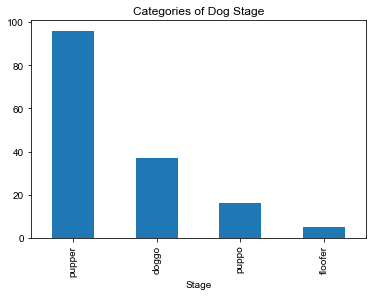

In [90]:
Twitter_data['dog_stage'].value_counts().plot(kind='bar')
plt.title('Categories of Dog Stage')
plt.xlabel('Stage')
sns.set(style='darkgrid')
plt.show()

**Pupper** is the most populous of all the dog stages 

#### 5. How many image(s) occured most in each tweet?

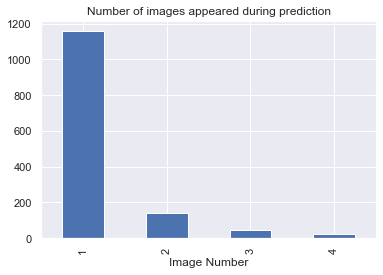

In [91]:
Twitter_data['img_num'].value_counts().plot(kind='bar')
plt.xlabel('Image Number')
plt.title('Number of images appeared during prediction')
plt.show()

Most of the tweet made by @weratedog has 1 image picture

#### 6. What are the top 5 dog breed?

In [92]:
Twitter_data.dog_breed.value_counts().nlargest(5)

Golden_retriever      130
Labrador_retriever     82
Pembroke               77
Chihuahua              71
Pug                    55
Name: dog_breed, dtype: int64

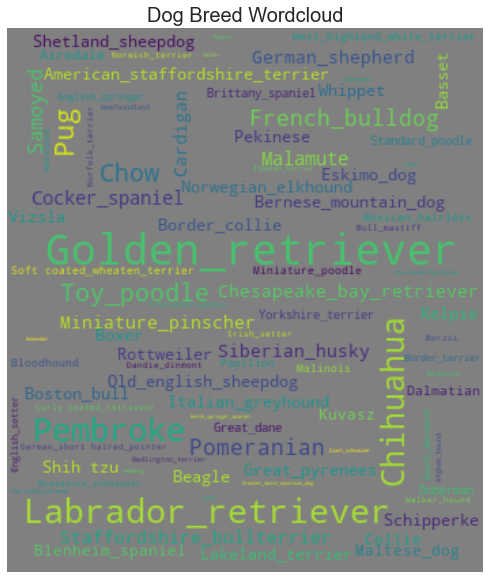

In [104]:

#creating the text variable
text= " ".join(cat for cat in Twitter_data.dog_breed)


#Generating word cloud
wordcloud = WordCloud(background_color='grey', max_words=1000,  stopwords=STOPWORDS,
              width=350, height=400,contour_width=0.1,contour_color='green').generate(text)


#Displaying the generated word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=20)
plt.axis('off')
plt.show()


In [106]:
#save to a png file
wordcloud.to_file("wordcloud.png")

**7. What are the top 3 breeds with high rating value?**

In [111]:
Breed_rating= Twitter_data.query('ratings == "14/10"')
Breed_rating.sort_values('favorite_count', ascending = False,inplace=True)

Top_5=Breed_rating[['name','dog_breed','favorite_count','jpg_url','ratings']].head(3)
Top_5

<ipython-input-111-05deb138fb38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Breed_rating.sort_values('favorite_count', ascending = False,inplace=True)


name       dog_breed  favorite_count  \
91   Walter  French_bulldog           55098   
55     Emmy  French_bulldog           42876   
325    Gary  French_bulldog           40402   

                                             jpg_url ratings  
91   https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   14/10  
55   https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg   14/10  
325  https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg   14/10

The top 3 breed of dog is French bulldog. 

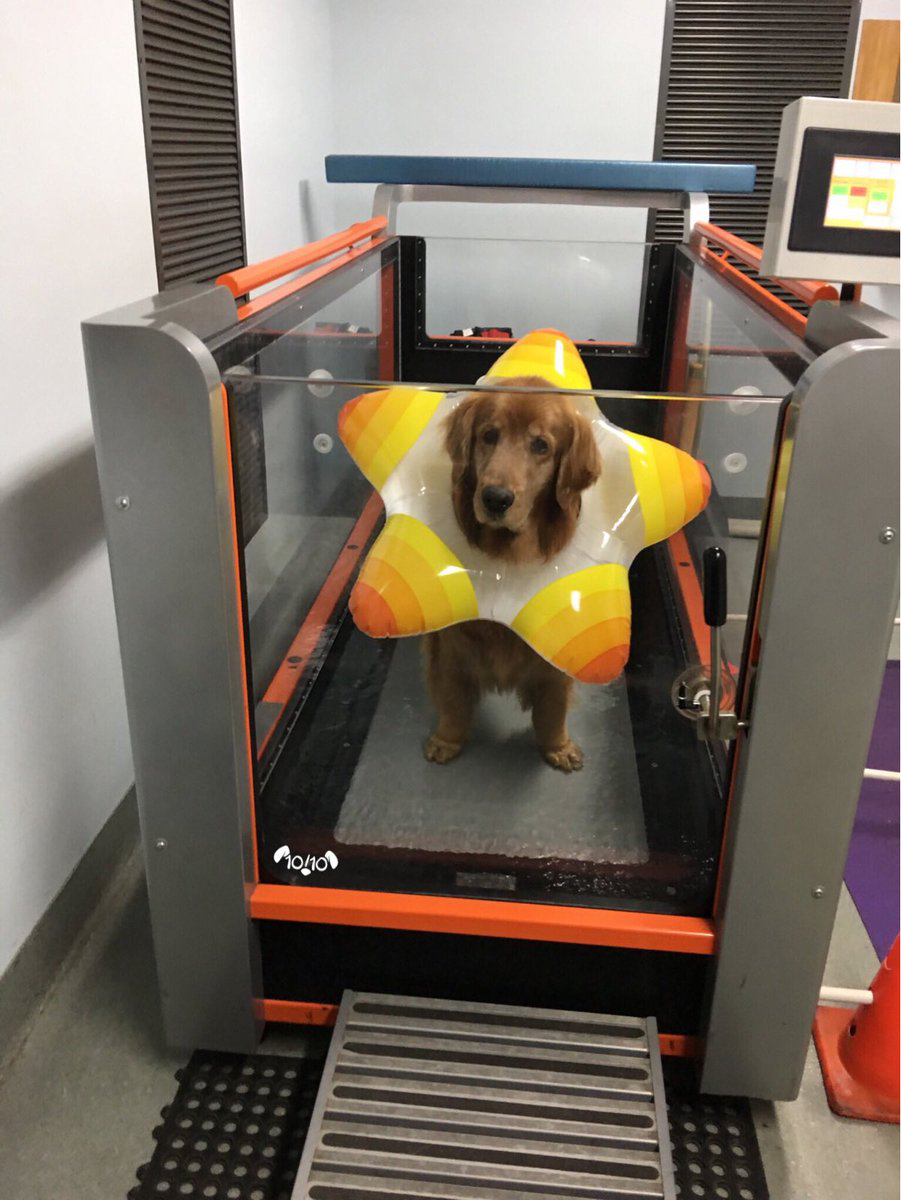

In [95]:
#loading image of the first dog breed with high rating
url = Top_5.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

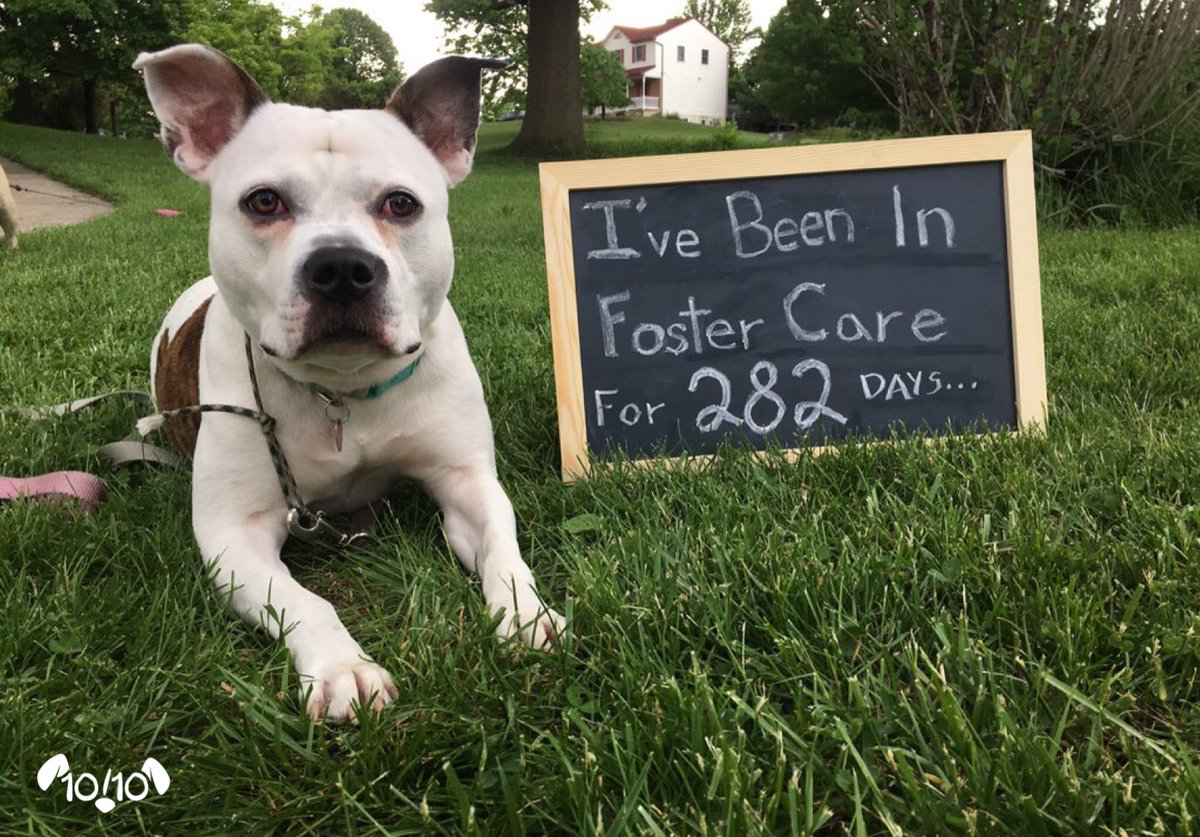

In [96]:
#loading image of the second dog breed with high rating
url = Top_5.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

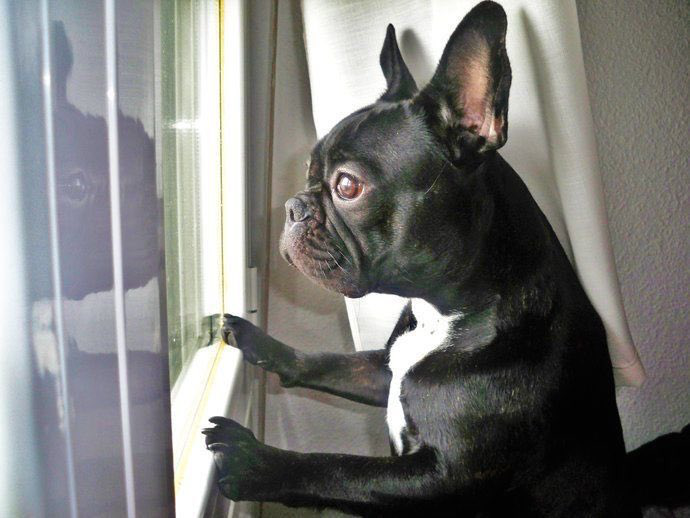

In [97]:
#loading image of the third dog breed with high rating
url = Top_5.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

**8. Is there a correlation between favourite count and retweet count?**

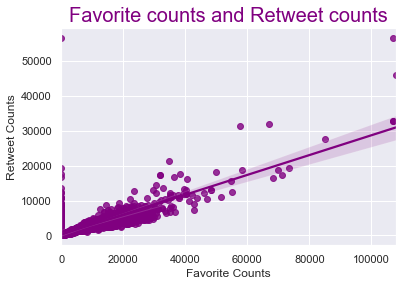

In [98]:
#creating a correlation visual3
sns.regplot(x='favorite_count', y='retweet_count', data=Twitter_data, color='purple')

plt.title("Favorite counts and Retweet counts",color="purple", size=20)
plt.ylabel("Retweet Counts")
plt.xlabel("Favorite Counts")
plt.show()

data_corr = Twitter_data.corr()

Favourite counts is inversely proportional to retweet count. In the correlation diagram, 
this clearly explain that the two variables shows a strong positive correlation. Therefore as favourite count increases, 
retweet count increases